# Importing Required packages

In [9]:
!pip install yfinance
!pip install fredapi
!pip install cbpro
!pip install pytz
import yfinance as yf
from fredapi import Fred
import numpy as np
import pandas as pd
import seaborn as sns
from pandas_datareader import data
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import urllib3
import json


Defaulting to user installation because normal site-packages is not writeable
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Attempting uninstall: requests
    Found existing installation: requests 2.13.0
    Uninstalling requests-2.13.0:
      Successfully uninstalled requests-2.13.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.
cbpro 1.1.4 requires requests==2.13.0, but you have requests 2.31.0 which is incompatible.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.
conda-repo-cli 1.0.20 requires requests==2.28.1, but you have requests 2.31.0 which is incompatible.
anaconda-client 1.11.0 requires six>=1.15.0, but you have six 1.10.0 which is incompatible.


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached requests-2.13.0-py2.py3-none-any.whl (584 kB)
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.
yfinance 0.2.12 requires requests>=2.26, but you have requests 2.13.0 which is incompatible.
tensorboard 2.12.0 requires requests<3,>=2.21.0, but you have requests 2.13.0 which is incompatible.
pandas-datareader 0.10.0 requires requests>=2.19.0, but you have requests 2.13.0 which is incompatible.
openai 0.26.5 requires requests>=2.20, but you have requests 2.13.0 which is incompatible.
geoip2 4.6.0 requires requests<3.0.0,>=2.24.0, but you have requests 2.13.0 which is incompatible.
cookiecutter 1.7.3 requires requests>=2.23.0, but you have requests 2.13.0 which is incompatible.
conda 22.9.0 requires requests>=2.20.1, but you have requests 2.13.0 which is incompatible.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which

Defaulting to user installation because normal site-packages is not writeable


# Downloading Data from Yahoo Finance!

In [39]:
#ticker
ticker = 'DOGE-USD'
#setting the period
start_date1 = '2017-12-01'
end_date1 = '2023-02-28'
#retrieving dataset
data1 = yf.download(ticker, start=start_date1, end=end_date1)['Adj Close']
# Extract the returns for the current asset
returns = data1.pct_change().dropna()
returns
#setting the window size

[*********************100%***********************]  1 of 1 completed


C:\Anaconda3\lib\site-packages\cryptography\hazmat\backends\openssl\x509.py:14: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  warnings.warn(


Date
2017-12-02    0.000466
2017-12-03    0.034435
2017-12-04    0.107962
2017-12-05    0.006496
2017-12-06    0.074223
                ...   
2023-02-23   -0.014521
2023-02-24   -0.040241
2023-02-25   -0.001409
2023-02-26    0.017528
2023-02-27   -0.010316
Name: Adj Close, Length: 1914, dtype: float64

<AxesSubplot:xlabel='Date'>

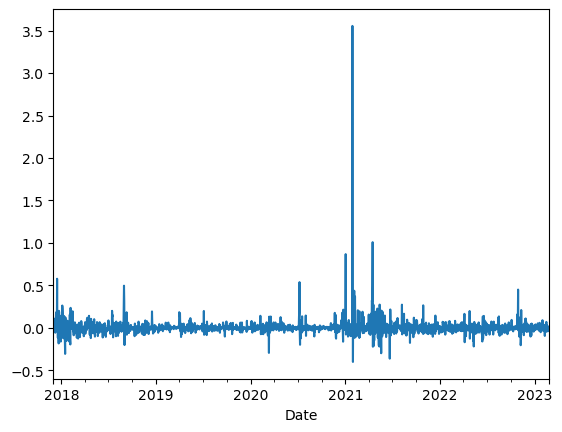

In [11]:
returns.plot()

<AxesSubplot:>

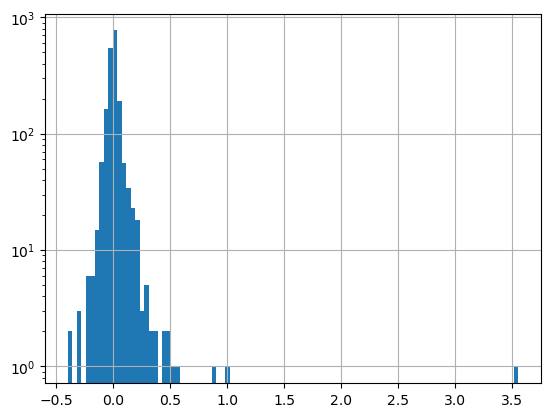

In [14]:
returns.hist(bins=100, log=True)

In [40]:
date_list = returns.index
returns = pd.DataFrame(returns)
returns.reset_index(drop=True, inplace=True)
returns['Date'] = date_list
returns['Date'] = returns['Date'] + pd.DateOffset(days=1)

In [41]:
returns

,Adj Close,Date
0,0.000466,2017-12-03
1,0.034435,2017-12-04
2,0.107962,2017-12-05
3,0.006496,2017-12-06
4,0.074223,2017-12-07
...,...,...
1909,-0.014521,2023-02-24
1910,-0.040241,2023-02-25
1911,-0.001409,2023-02-26
1912,0.017528,2023-02-27


# Scraping Twits from StockTwits

In [4]:
http = urllib3.PoolManager()
ticker = "DOGE.X"
rows = []
for l in range(0, 350):
    if l == 0:
        url = f"https://api.stocktwits.com/api/2/streams/symbol/{ticker}.json"
    else:
        url = f"https://api.stocktwits.com/api/2/streams/symbol/{ticker}.json?max=" + str(lid)
    print(url)

    r = http.request('GET', url)
    data = json.loads(r.data)

    for t in data["messages"]:
        lid = t["id"]
        date = t["created_at"]
        text = t["body"]
        sentiment = t["entities"]["sentiment"]

        if sentiment == None:
            sentiment = np.nan
        else:
            sentiment = sentiment["basic"]
            if sentiment == "Bullish":
                sentiment = 1
            if sentiment == "Bearish":
                sentiment = -1
        rows.append((date, text, sentiment))

df = pd.DataFrame(rows, columns=["date","text","sentiment"])

#ticker
ticker = 'DOGE-USD'
#setting the period
start_date1 = '2017-12-01'
end_date1 = '2023-02-28'
 
#retrieving dataset
data1 = yf.download(ticker, start=start_date1, end=end_date1)['Adj Close']
 
# Extract the returns for the current asset
returns = data1.pct_change().dropna()
returns

#setting the window size

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=531277926
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=531259141
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=531238314
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=531213612
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=531190868
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=531168722
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=531159940
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=531154745
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=531146303
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=531136202
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=531115300
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=531089883
https://api.stocktwits.com/api/2/streams/symbol/DOGE

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=530462112
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=530432236
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=530403758
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=530382252
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=530370554
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=530365776
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=530362748
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=530359815
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=530355295
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=530343338
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=530326236
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=530306330
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=530277783
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=529103128
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=529098231
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=529089550
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=529082698
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=529066087
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=529043667
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=529014457
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=528974238
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=528951699
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=528940692
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=528938027
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=528933673
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=528929677
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=527773543
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=527771817
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=527769485
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=527767353
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=527763776
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=527762879
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=527759826
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=527756157
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=527752560
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=527747171
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=527742162
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=527738119
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=527733189
https://api.stocktwits.com/api/2/strea

C:\Anaconda3\lib\site-packages\cryptography\hazmat\backends\openssl\x509.py:14: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  warnings.warn(


Date
2017-12-02    0.000466
2017-12-03    0.034435
2017-12-04    0.107962
2017-12-05    0.006496
2017-12-06    0.074223
                ...   
2023-02-23   -0.014521
2023-02-24   -0.040241
2023-02-25   -0.001409
2023-02-26    0.017528
2023-02-27   -0.010316
Name: Adj Close, Length: 1914, dtype: float64

In [5]:
df

,date,text,sentiment
0,2023-06-08T21:00:36Z,"$DOGE.X oh boy, it’s coming!!!!! It’s coiling ...",1.0
1,2023-06-08T20:57:22Z,$DOGE.X nothing to see,1.0
2,2023-06-08T20:55:48Z,"$DOGE.X Thanks for the free Doge yesterday, I ...",-1.0
3,2023-06-08T20:55:33Z,$DOGE.X can we get a run,1.0
4,2023-06-08T20:55:15Z,$DOGE.X 🍻 cheers fom,1.0
...,...,...,...
10495,2023-05-14T00:14:46Z,$DOGE.X dogecoin is lit 🔥 and I like dogs 😁,1.0
10496,2023-05-14T00:14:05Z,"$DOGE.X come at me bro, ima put yo azz on a mf...",1.0
10497,2023-05-14T00:14:01Z,$DOGE.X rocket emoji-the live leak: 🚀,1.0
10498,2023-05-14T00:13:44Z,$DOGE.X rocket emoji rocket emoji rocket emoji,1.0


In [24]:
# Convert the 'Timestamp' column to datetime type
df['date'] = pd.to_datetime(df['date'])
# Convert the timestamps from GMT to CET
df['date'] = df['date'].dt.tz_convert('Europe/Paris')

In [25]:
df

,date,text,sentiment
0,2023-06-08 23:00:36+02:00,"$DOGE.X oh boy, it’s coming!!!!! It’s coiling ...",1.0
1,2023-06-08 22:57:22+02:00,$DOGE.X nothing to see,1.0
2,2023-06-08 22:55:48+02:00,"$DOGE.X Thanks for the free Doge yesterday, I ...",-1.0
3,2023-06-08 22:55:33+02:00,$DOGE.X can we get a run,1.0
4,2023-06-08 22:55:15+02:00,$DOGE.X 🍻 cheers fom,1.0
...,...,...,...
10495,2023-05-14 02:14:46+02:00,$DOGE.X dogecoin is lit 🔥 and I like dogs 😁,1.0
10496,2023-05-14 02:14:05+02:00,"$DOGE.X come at me bro, ima put yo azz on a mf...",1.0
10497,2023-05-14 02:14:01+02:00,$DOGE.X rocket emoji-the live leak: 🚀,1.0
10498,2023-05-14 02:13:44+02:00,$DOGE.X rocket emoji rocket emoji rocket emoji,1.0
